# Fig 1b. Average predicted peak shape per model, compared to the average experimental ATAC-seq peak shape across all 8 cell lines used in cross-validation.

Using the peak predictions (output npz after training), normalized all samples to max 1 and then took mean per bin per model.
This is an example of one cell line results.

Current state: dCNN is final for 4 ENCODE cell lines.
TODO: take mean shape across all 8 CV cell lines for all 4 models.

{'../data/generated/predictions/evalpeaks_GM12878sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz': dict_keys(['chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalpeaks_GM12878sp_LSTM_testb.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalpeaks_GM12878sp_CNN_testb.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13'])}
Keeping chroms: {'chr11', 'chr13', 'chr1', 'chr20'}
Shapes: [(33229, 512), (33229, 512), (33229, 512), (33229, 512)]


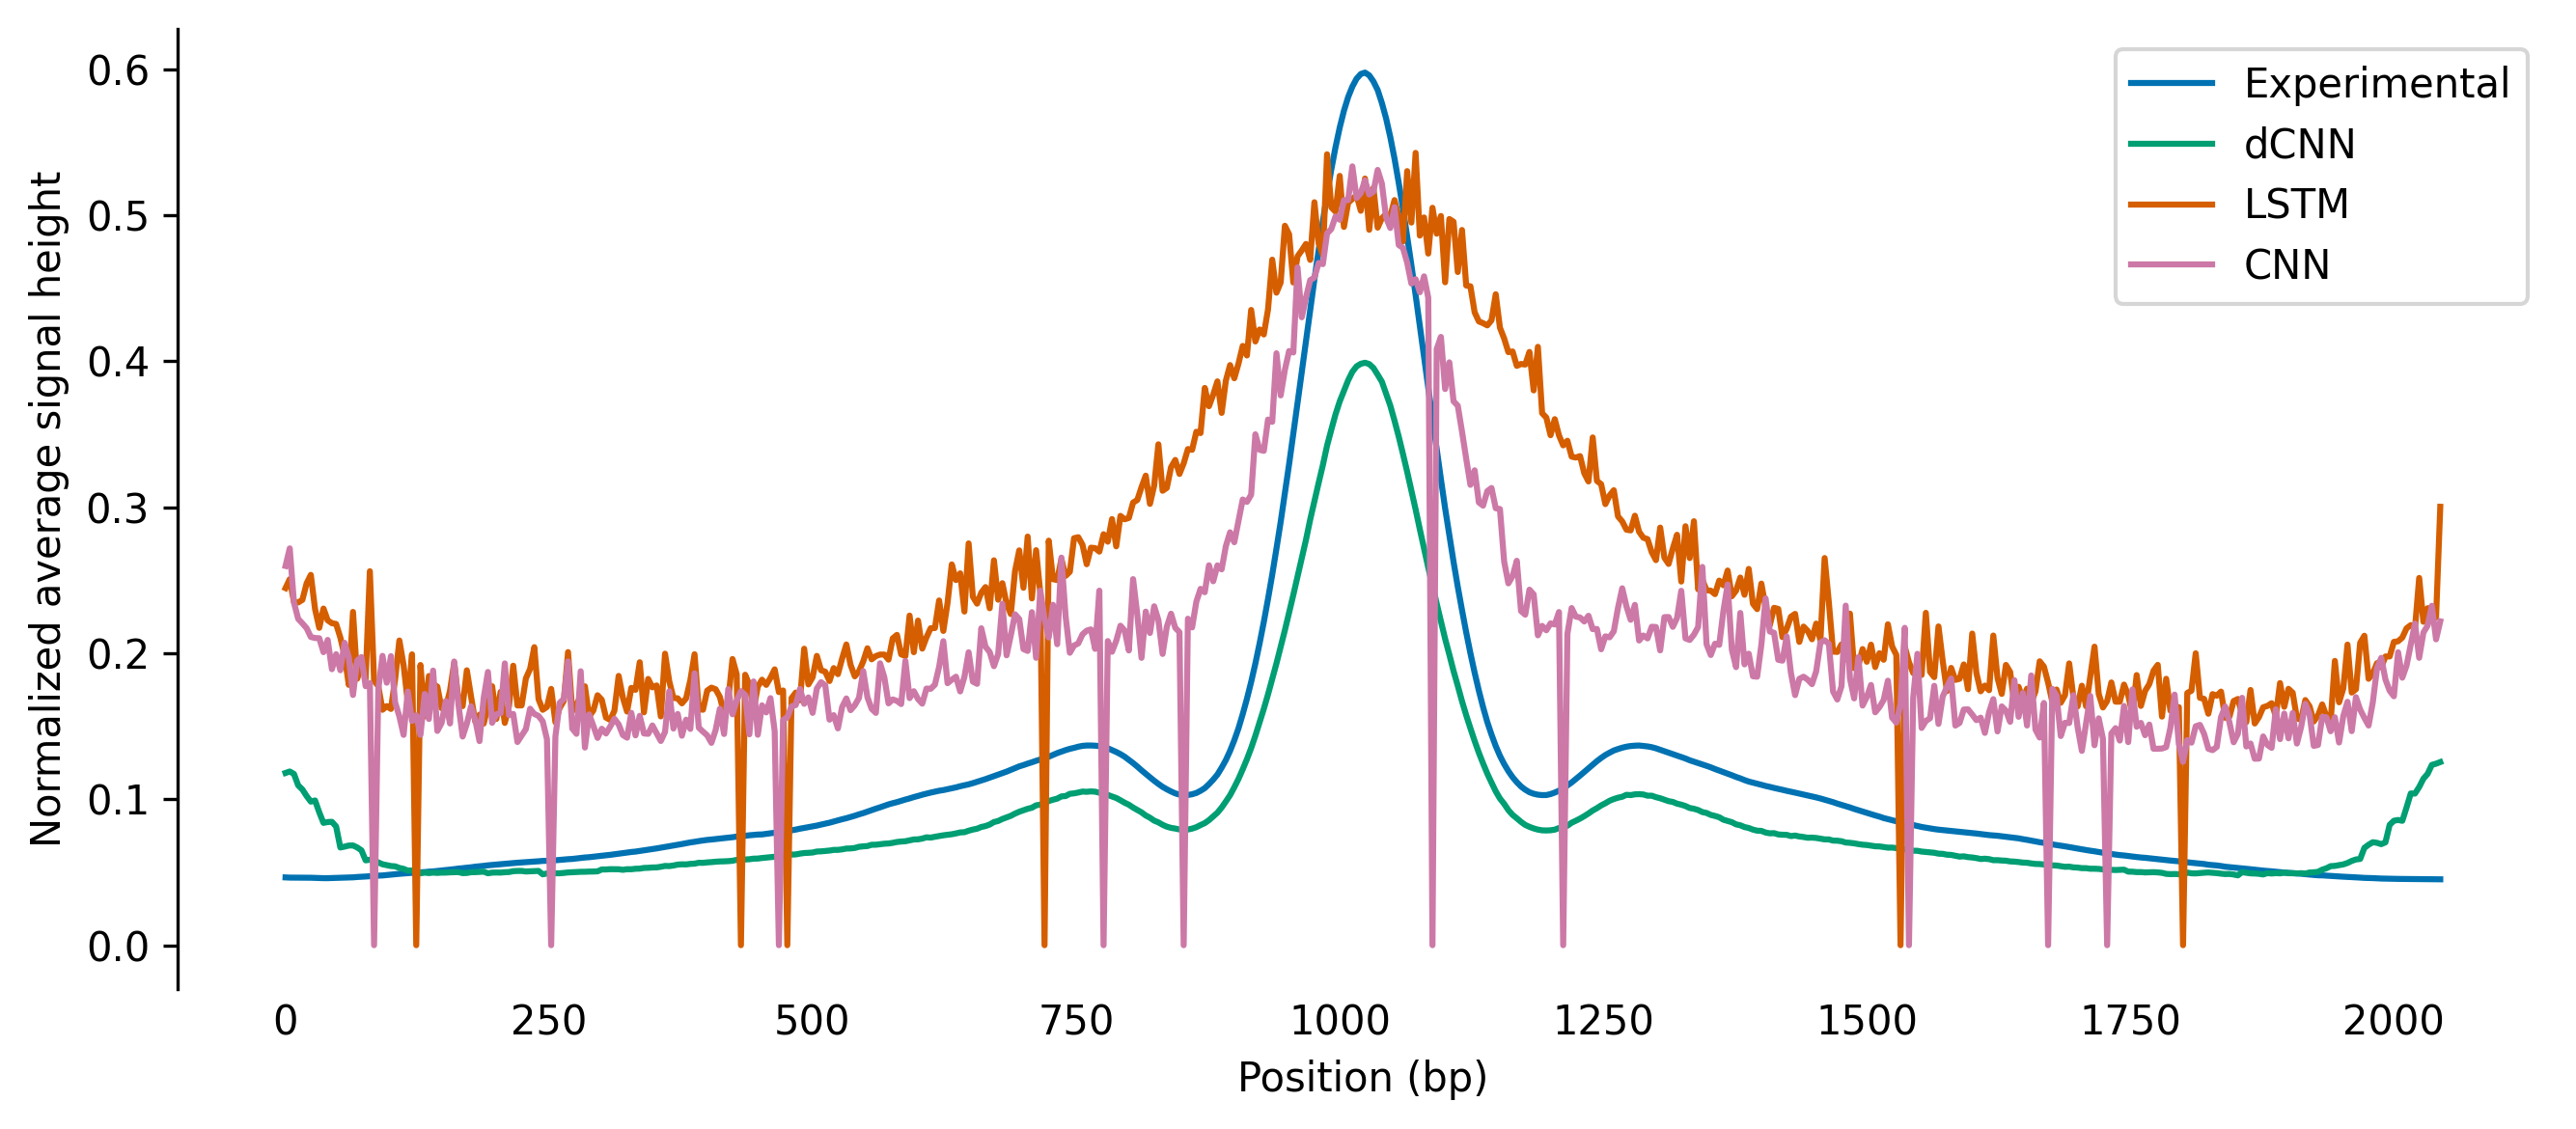

In [12]:
import numpy as np
from matplotlib import pyplot as plt, style

from notebooks.utils import get_peak_data

style.use('seaborn-v0_8-colorblind')


def plot_average_peak_shape(arr: np.ndarray, label=None, scale_std=0.5, add_variance: bool = True):
    x = np.arange(0, 2048, 4)
    mean, std = arr.mean(axis=0), arr.std(axis=0) * scale_std
    plt.plot(x, mean, label=label)
    if add_variance:
        plt.fill_between(x, mean - std, mean + std, alpha=0.1)


def make_plot_for_prediction(true_npz, pred_npz):
    y, y_pred = get_peak_data([true_npz, pred_npz], normalize=True)

    plot_average_peak_shape(y)
    plot_average_peak_shape(y_pred)


def plot_all_model_predictions(name_to_file: dict[str, str]):
    plt.figure(figsize=(9, 4), dpi=300)

    ys = get_peak_data(list(name_to_file.values()), normalize=True)
    for name, y in zip(name_to_file, ys):
        plot_average_peak_shape(y, label=name, add_variance=False)
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(axis='x', length=0)

    plt.ylabel('Normalized average signal height')
    plt.xlabel('Position (bp)')

    plt.tight_layout()
    plt.savefig('fig1b.svg', format='svg')
    plt.show()


plot_all_model_predictions({
    'Experimental': '../data/generated/predictions/evalpeaks_GM12878sp.npz',
    'dCNN': '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz',
    'LSTM': '../data/generated/predictions/evalpeaks_GM12878sp_LSTM_testb.npz',
    'CNN': '../data/generated/predictions/evalpeaks_GM12878sp_CNN_testb.npz',
})

{'../data/generated/predictions/evalpeaks_GM12878sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz': dict_keys(['chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalpeaks_HepG2sp.npz': dict_keys(['chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr1', 'chr11', 'chr20', 'chr13', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr9', 'chr15', 'chr6', 'chr7', 'chr8', 'chr18', 'chr4', 'chr5']), '../data/generated/predictions/evalpeaks_HepG2sp_dCNN_fig1.npz': dict_keys(['chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr1', 'chr11', 'chr20', 'chr13', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr9', 'chr15'

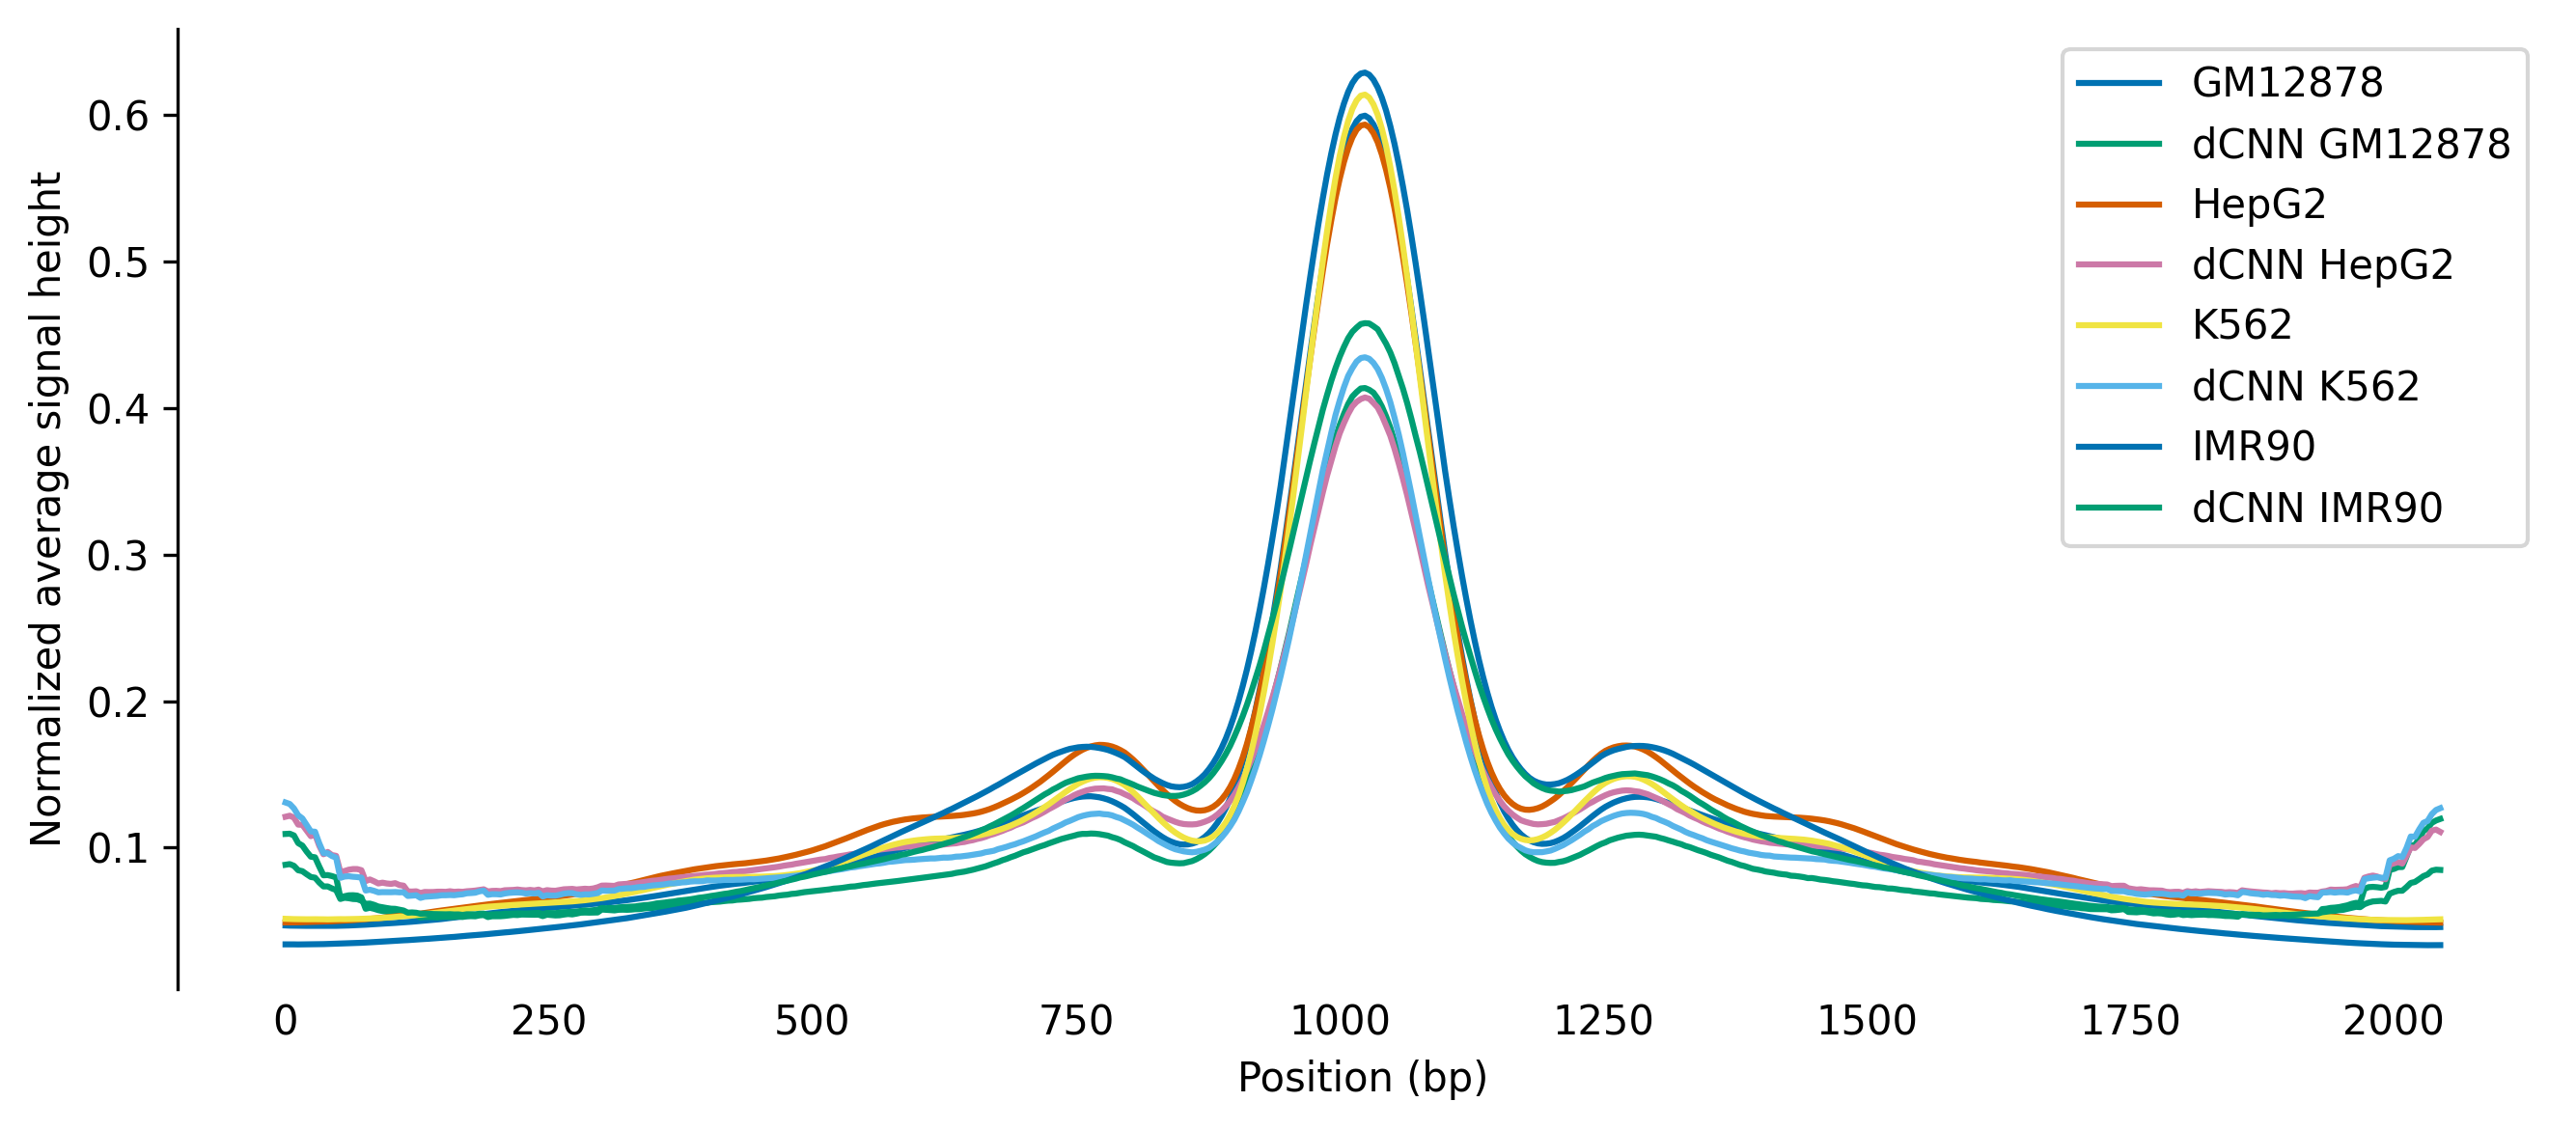

In [4]:
# just to show that these peak shapes are similar within experimental peaks and predicted peaks
plot_all_model_predictions({
    'GM12878': '../data/generated/predictions/evalpeaks_GM12878sp.npz',
    'dCNN GM12878': '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz',
    'HepG2': '../data/generated/predictions/evalpeaks_HepG2sp.npz',
    'dCNN HepG2': '../data/generated/predictions/evalpeaks_HepG2sp_dCNN_fig1.npz',
    'K562': '../data/generated/predictions/evalpeaks_K562sp.npz',
    'dCNN K562': '../data/generated/predictions/evalpeaks_K562sp_dCNN_fig1.npz',
    'IMR90': '../data/generated/predictions/evalpeaks_IMR90sp.npz',
    'dCNN IMR90': '../data/generated/predictions/evalpeaks_IMR90sp_dCNN_fig1.npz',
})

{'../data/generated/predictions/evalpeaks_GM12878sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalpeaks_HepG2sp.npz': dict_keys(['chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr1', 'chr11', 'chr20', 'chr13', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr9', 'chr15', 'chr6', 'chr7', 'chr8', 'chr18', 'chr4', 'chr5']), '../data/generated/predictions/evalpeaks_K562sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr8', 'chr18', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr4', 'chr5', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalpeaks_IMR90sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr9', 'chr15', 'chr6', 'chr7', 'chr2', 'chr8', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr18', 'chr4', 'chr5', 'chr10',

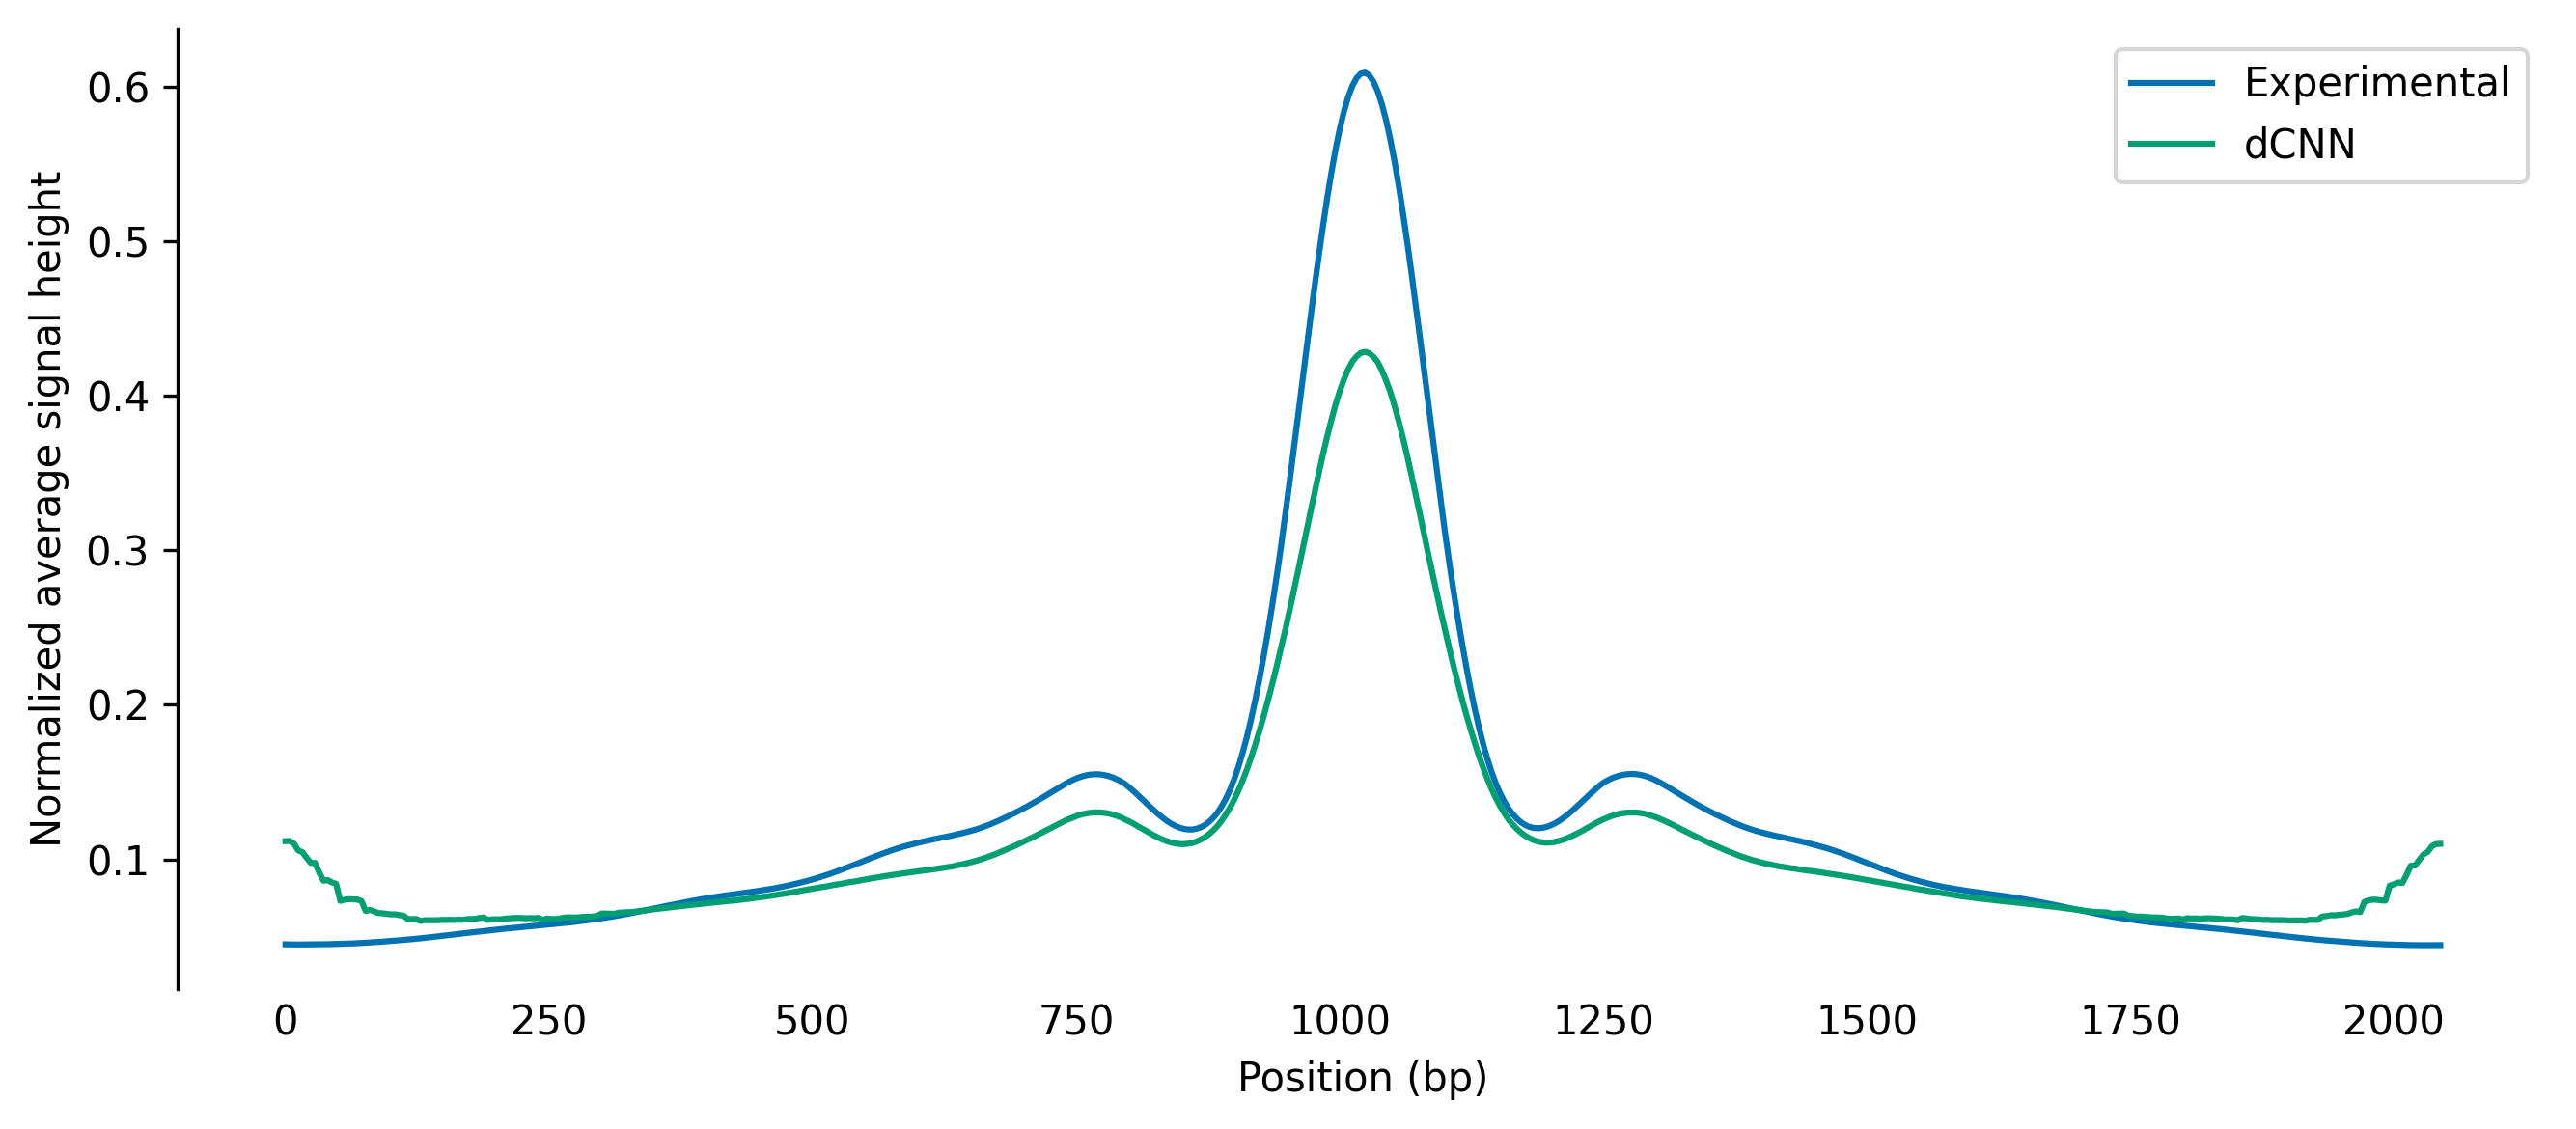

In [9]:
# take mean per model (/experimental) across all cell lines with CV

def get_concat_peak_data(files: list[str]):
    ys = get_peak_data(files, normalize=True)
    return np.concatenate(ys, axis=0)

def plot_averaged_predictions(name_to_files: dict[str, list[str]]):
    plt.figure(figsize=(9, 4), dpi=300)

    ys = [get_concat_peak_data(f) for f in name_to_files.values()]
    for name, y in zip(name_to_files, ys):
        print(name, y.shape)
        plot_average_peak_shape(y, label=name, add_variance=False)
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(axis='x', length=0)

    plt.ylabel('Normalized average signal height')
    plt.xlabel('Position (bp)')

    plt.tight_layout()
    plt.savefig('fig1b.svg', format='svg')
    plt.show()


plot_averaged_predictions({
    'Experimental': [
        '../data/generated/predictions/evalpeaks_GM12878sp.npz',
        '../data/generated/predictions/evalpeaks_HepG2sp.npz',
        '../data/generated/predictions/evalpeaks_K562sp.npz',
        '../data/generated/predictions/evalpeaks_IMR90sp.npz',
    ],
    'dCNN': [
        '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz',
        '../data/generated/predictions/evalpeaks_HepG2sp_dCNN_fig1.npz',
        '../data/generated/predictions/evalpeaks_K562sp_dCNN_fig1.npz',
        '../data/generated/predictions/evalpeaks_IMR90sp_dCNN_fig1.npz',
    ],
})